In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegressionCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report

In [3]:
df=pd.read_csv(r'/content/Table_1.csv')
df

,table id,name,phone number,Location,Emp. Group,Function,Gender,Tenure,Tenure Grp.,Experience (YY.MM),Marital Status,Age in YY.,Hiring Source,Promoted/Non Promoted,Job Role Match,Stay/Left
0,1,sid,9876544345,Pune,B2,Operation,Male,0.00,< =1,6.08,Single,27.12,Direct,Non Promoted,Yes,Left
1,2,sid,9876544345,Noida,B7,Support,Male,0.00,< =1,13.00,Marr.,38.08,Direct,Promoted,No,Stay
2,3,sid,9876544345,Bangalore,B3,Operation,Male,0.01,< =1,16.05,Marr.,36.04,Direct,Promoted,Yes,Stay
3,4,sid,9876544345,Noida,B2,Operation,Male,0.01,< =1,6.06,Marr.,32.07,Direct,Promoted,Yes,Stay
4,5,sid,9876544345,Lucknow,B2,Operation,Male,0.00,< =1,7.00,Marr.,32.05,Direct,Non Promoted,Yes,Stay
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
897,898,Rahul,9876544345,Vijayawada,B1,Operation,Female,0.03,< =1,0.03,Single,21.09,Direct,Non Promoted,Yes,Stay
898,899,Rahul,9876544345,Vijayawada,B1,Operation,Female,0.03,< =1,0.03,Single,22.02,Direct,Non Promoted,Yes,Left
899,900,Rahul,9876544345,Vijayawada,B1,Operation,Female,0.03,< =1,0.03,Single,22.01,Direct,Non Promoted,NaN,Left
900,901,Rahul,9876544345,Vijayawada,B1,Operation,Female,0.03,< =1,0.03,Single,22.02,Direct,Non Promoted,Yes,Stay


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 902 entries, 0 to 901
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   table id               902 non-null    int64  
 1   name                   902 non-null    object 
 2   phone number           902 non-null    int64  
 3   Location               902 non-null    object 
 4   Emp. Group             902 non-null    object 
 5   Function               902 non-null    object 
 6   Gender                 902 non-null    object 
 7   Tenure                 902 non-null    float64
 8   Tenure Grp.            902 non-null    object 
 9   Experience (YY.MM)     898 non-null    float64
 10  Marital Status         902 non-null    object 
 11  Age in YY.             902 non-null    float64
 12  Hiring Source          902 non-null    object 
 13  Promoted/Non Promoted  902 non-null    object 
 14  Job Role Match         900 non-null    object 
 15  Stay/L

In [5]:
df.isnull().sum()

table id                 0
name                     0
phone number             0
Location                 0
Emp. Group               0
Function                 0
Gender                   0
Tenure                   0
Tenure Grp.              0
Experience (YY.MM)       4
Marital Status           0
Age in YY.               0
Hiring Source            0
Promoted/Non Promoted    0
Job Role Match           2
Stay/Left                0
dtype: int64

In [6]:
df.duplicated().sum()

0

In [7]:
#drop the null values
df.dropna(axis=0,inplace=True)

In [8]:
df.isnull().sum()

table id                 0
name                     0
phone number             0
Location                 0
Emp. Group               0
Function                 0
Gender                   0
Tenure                   0
Tenure Grp.              0
Experience (YY.MM)       0
Marital Status           0
Age in YY.               0
Hiring Source            0
Promoted/Non Promoted    0
Job Role Match           0
Stay/Left                0
dtype: int64

In [9]:
gender_col=df['Gender '].value_counts()
gender_col

Gender 
Male      656
Female    234
other       6
Name: count, dtype: int64

<Axes: xlabel='Gender '>

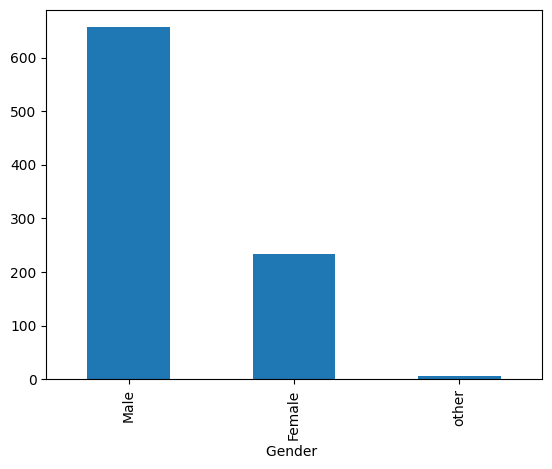

In [10]:
gender_col.plot(kind='bar')

In [11]:
stay_col=df['Stay/Left'].value_counts()
stay_col

Stay/Left
Stay    592
Left    304
Name: count, dtype: int64

<Axes: xlabel='Stay/Left'>

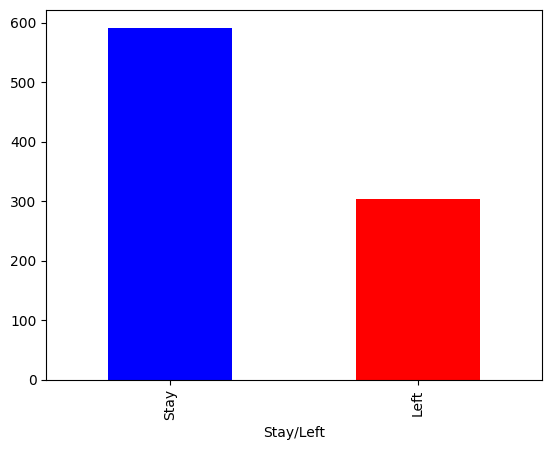

In [12]:
stay_col.plot(kind='bar',color=['blue','red'])

In [13]:
# how gender could be the reason for employees to leave the company or to stay in.

In [14]:
crosstab1=pd.crosstab(index=df['Gender '],columns=df['Stay/Left'])
print(crosstab1)

Stay/Left  Left  Stay
Gender               
Female       72   162
Male        230   426
other         2     4


<Axes: xlabel='Gender '>

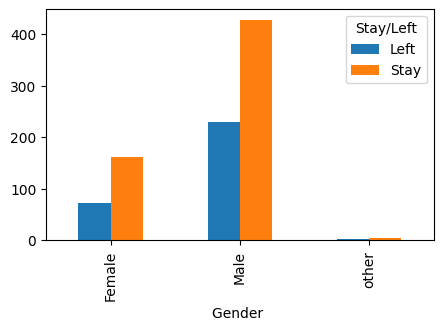

In [15]:
crosstab1.plot(kind="bar",figsize=(5,3))

In [16]:
#from the chart it’s visible that Attition is heavily depends on males, also we can see that it’s either male, female or others but more number of them are staying in the company.

In [17]:
crosstab2=pd.crosstab(index=df['Promoted/Non Promoted'],columns=df['Stay/Left'])
print(crosstab2)

Stay/Left              Left  Stay
Promoted/Non Promoted            
Non Promoted            121   318
Promoted                183   274


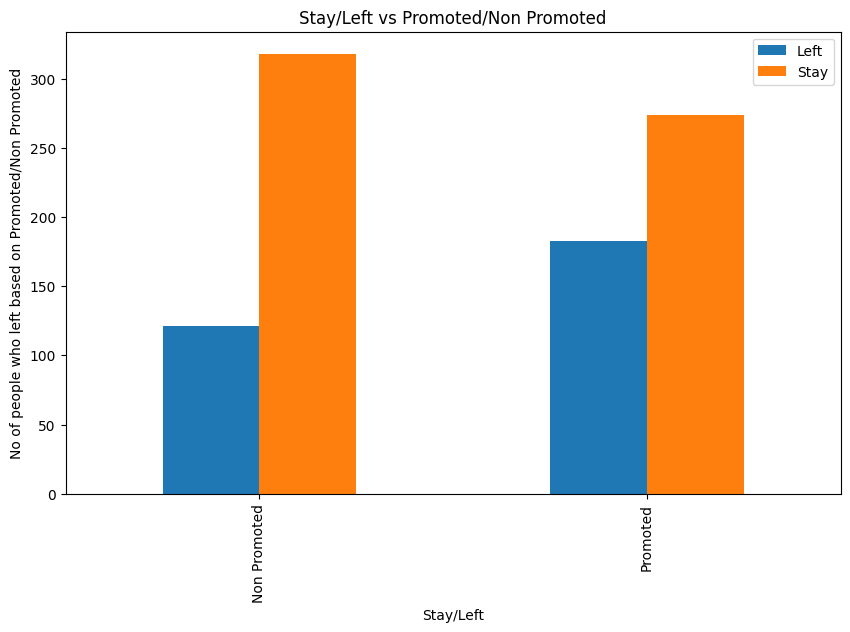

In [18]:
crosstab2.plot(kind="bar",figsize=(10,6))
plt.title("Stay/Left vs Promoted/Non Promoted")
plt.xlabel("Stay/Left")
plt.ylabel("No of people who left based on Promoted/Non Promoted")
plt.legend(["Left","Stay"])

In [19]:
#from the chart, it’s visible that the ones who are not promoted are leaving the company more as compared to the ones who are promoted

In [20]:
crosstab3=pd.crosstab(index=df['Job Role Match'],columns=df['Stay/Left'])
print(crosstab3)

Stay/Left       Left  Stay
Job Role Match            
No               284   131
Yes               20   461


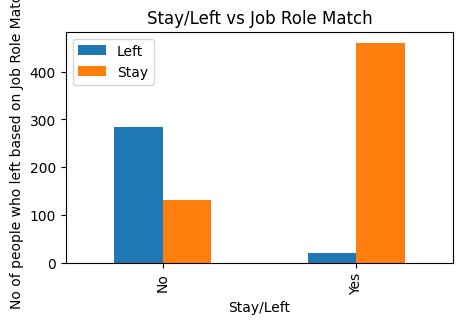

In [21]:
crosstab3.plot(kind="bar",figsize=(5,3))
plt.title("Stay/Left vs Job Role Match")
plt.xlabel("Stay/Left")
plt.ylabel("No of people who left based on Job Role Match")
plt.legend(["Left","Stay"])

In [22]:
#in the above chart, we can see that the number of employees who got the correct job role is staying in the company rather than the ones who don’t have their right job role.

In [23]:
crosstab4=pd.crosstab(index=df['Tenure Grp.'],columns=df['Stay/Left'])
print(crosstab4)

Stay/Left    Left  Stay
Tenure Grp.            
< =1           97   173
> 1 & < =3    207   419


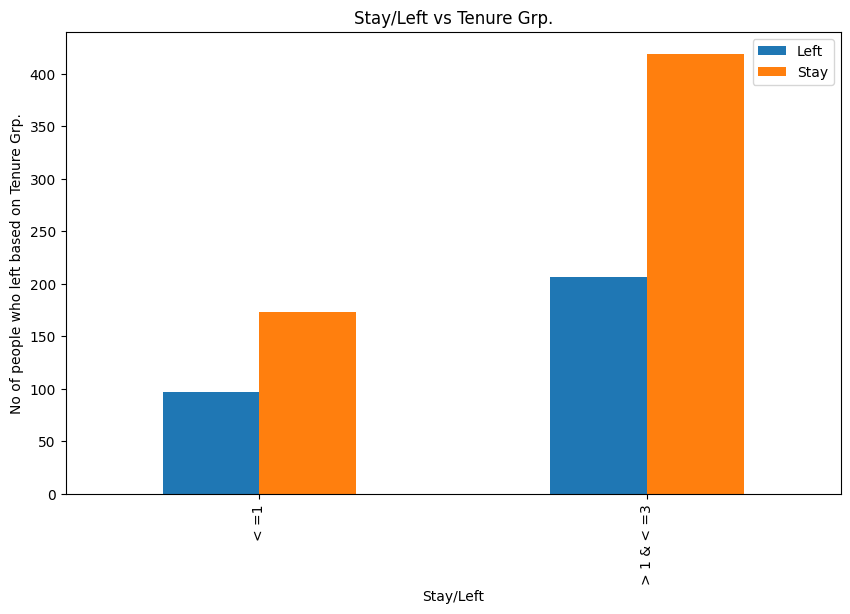

In [24]:
crosstab4.plot(kind="bar",figsize=(10,6))
plt.title("Stay/Left vs Tenure Grp.")
plt.xlabel("Stay/Left")
plt.ylabel("No of people who left based on Tenure Grp.")
plt.legend(["Left","Stay"])

In [25]:
df.columns

Index(['table id', 'name', 'phone number', 'Location', 'Emp. Group',
       'Function', 'Gender ', 'Tenure', 'Tenure Grp.', 'Experience (YY.MM)',
       'Marital Status', 'Age in YY.', 'Hiring Source',
       'Promoted/Non Promoted', 'Job Role Match', 'Stay/Left'],
      dtype='object')

In [26]:
conv_df=pd.get_dummies(df[['Location', 'Emp. Group','Function', 'Gender ', 'Tenure Grp.','Marital Status', 'Hiring Source','Promoted/Non Promoted', 'Job Role Match', 'Stay/Left']],drop_first=True).astype(int)
conv_df

,Location_Chennai,Location_Gurgaon,Location_Hyderabad,Location_Kolkata,Location_Lucknow,Location_Madurai,Location_Mumbai,Location_Nagpur,Location_Noida,Location_Pune,...,Tenure Grp._> 1 & < =3,Marital Status_Marr.,Marital Status_NTBD,Marital Status_Sep.,Marital Status_Single,Hiring Source_Direct,Hiring Source_Employee Referral,Promoted/Non Promoted_Promoted,Job Role Match_Yes,Stay/Left_Stay
0,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,1,1,0,0,1,0
1,0,0,0,0,0,0,0,0,1,0,...,0,1,0,0,0,1,0,1,0,1
2,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,1,0,1,1,1
3,0,0,0,0,0,0,0,0,1,0,...,0,1,0,0,0,1,0,1,1,1
4,0,0,0,0,1,0,0,0,0,0,...,0,1,0,0,0,1,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
896,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,1,0,0,1,1
897,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,1,0,0,1,1
898,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,1,0,0,1,0
900,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,1,0,0,1,1


In [27]:
dataset = pd.concat([df,conv_df],axis=1)
dataset

,table id,name,phone number,Location,Emp. Group,Function,Gender,Tenure,Tenure Grp.,Experience (YY.MM),...,Tenure Grp._> 1 & < =3,Marital Status_Marr.,Marital Status_NTBD,Marital Status_Sep.,Marital Status_Single,Hiring Source_Direct,Hiring Source_Employee Referral,Promoted/Non Promoted_Promoted,Job Role Match_Yes,Stay/Left_Stay
0,1,sid,9876544345,Pune,B2,Operation,Male,0.00,< =1,6.08,...,0,0,0,0,1,1,0,0,1,0
1,2,sid,9876544345,Noida,B7,Support,Male,0.00,< =1,13.00,...,0,1,0,0,0,1,0,1,0,1
2,3,sid,9876544345,Bangalore,B3,Operation,Male,0.01,< =1,16.05,...,0,1,0,0,0,1,0,1,1,1
3,4,sid,9876544345,Noida,B2,Operation,Male,0.01,< =1,6.06,...,0,1,0,0,0,1,0,1,1,1
4,5,sid,9876544345,Lucknow,B2,Operation,Male,0.00,< =1,7.00,...,0,1,0,0,0,1,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
896,897,Rahul,9876544345,Vijayawada,B1,Operation,Male,0.03,< =1,0.03,...,0,0,0,0,1,1,0,0,1,1
897,898,Rahul,9876544345,Vijayawada,B1,Operation,Female,0.03,< =1,0.03,...,0,0,0,0,1,1,0,0,1,1
898,899,Rahul,9876544345,Vijayawada,B1,Operation,Female,0.03,< =1,0.03,...,0,0,0,0,1,1,0,0,1,0
900,901,Rahul,9876544345,Vijayawada,B1,Operation,Female,0.03,< =1,0.03,...,0,0,0,0,1,1,0,0,1,1


In [28]:
new_data=dataset.drop(['table id', 'name', 'phone number', 'Location', 'Emp. Group','Function', 'Gender ', 'Tenure Grp.','Marital Status', 'Hiring Source','Promoted/Non Promoted', 'Job Role Match', 'Stay/Left'], axis=1)

In [29]:
new_data.head()

,Tenure,Experience (YY.MM),Age in YY.,Location_Chennai,Location_Gurgaon,Location_Hyderabad,Location_Kolkata,Location_Lucknow,Location_Madurai,Location_Mumbai,...,Tenure Grp._> 1 & < =3,Marital Status_Marr.,Marital Status_NTBD,Marital Status_Sep.,Marital Status_Single,Hiring Source_Direct,Hiring Source_Employee Referral,Promoted/Non Promoted_Promoted,Job Role Match_Yes,Stay/Left_Stay
0,0.00,6.08,27.12,0,0,0,0,0,0,0,...,0,0,0,0,1,1,0,0,1,0
1,0.00,13.00,38.08,0,0,0,0,0,0,0,...,0,1,0,0,0,1,0,1,0,1
2,0.01,16.05,36.04,0,0,0,0,0,0,0,...,0,1,0,0,0,1,0,1,1,1
3,0.01,6.06,32.07,0,0,0,0,0,0,0,...,0,1,0,0,0,1,0,1,1,1
4,0.00,7.00,32.05,0,0,0,0,1,0,0,...,0,1,0,0,0,1,0,0,1,1


In [30]:
x = new_data.drop("Stay/Left_Stay",axis=1)
y = new_data[["Stay/Left_Stay"]]

In [31]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [32]:
lg = LogisticRegressionCV()
lg.fit(x_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter)

LogisticRegressionCV()

In [33]:
y_pred = lg.predict(x_test)
y_pred

array([1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1,
       0, 1, 0, 1])

In [34]:
accuracy_score(y_test,y_pred)

0.9

In [35]:
cf_matrix = confusion_matrix(y_test, y_pred)
cf_matrix

array([[ 42,   6],
       [ 12, 120]])

In [36]:
#True Positives (TP): The model correctly predicted that 42 employees would leave the organization.
#False Positives (FP): The model incorrectly predicted that 6 employees would leave the organization (i.e., they actually stayed).
#False Negatives (FN): The model incorrectly predicted that 12 employees would stay in the organization (i.e., they actually left).
#True Negatives (TN): The model correctly predicted that 120 employees would stay in the organization.

Text(0.5, 23.52222222222222, 'Predicted label')

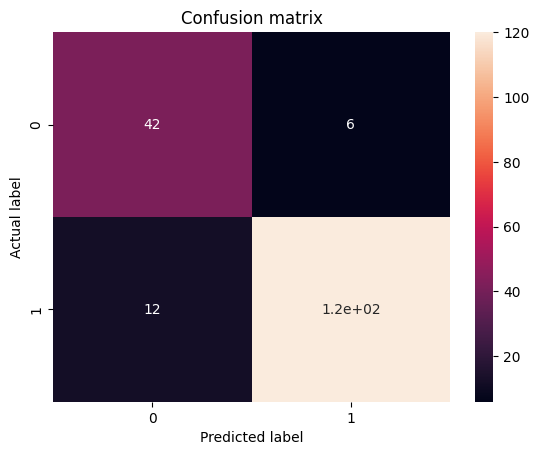

In [49]:
#Visuaization 1
sns.heatmap(cf_matrix, annot=True)
plt.title('Confusion matrix')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

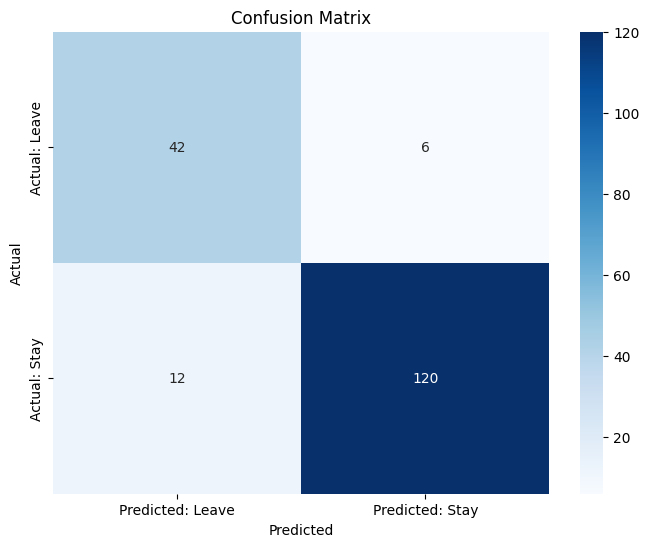

In [51]:
#Visulaization 2
plt.figure(figsize=(8, 6))
sns.heatmap(cf_matrix, annot=True, cmap='Blues', fmt='g',
            xticklabels=['Predicted: Leave', 'Predicted: Stay'],
            yticklabels=['Actual: Leave', 'Actual: Stay'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()
#cmap=colourmap
#fmt= "format" and it determines the format for displaying the values in each cell of the heatmap.
#In this case, 'g' is used which stands for 'general' format, meaning that values are displayed as integers if they are integers and otherwise displayed in decimal format.

In [38]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.78      0.88      0.82        48
           1       0.95      0.91      0.93       132

    accuracy                           0.90       180
   macro avg       0.87      0.89      0.88       180
weighted avg       0.91      0.90      0.90       180



In [39]:
dtc = DecisionTreeClassifier()

# Fit the classifier to the data
dtc.fit(x_train, y_train)

DecisionTreeClassifier()

In [40]:
y_pred1 = dtc.predict(x_test)

In [41]:
accuracy_score(y_test,y_pred1)

0.85

In [42]:
cf_matrix1 = confusion_matrix(y_test, y_pred1)
cf_matrix1

array([[ 33,  15],
       [ 12, 120]])

In [43]:
rfc=RandomForestClassifier(n_estimators=10)
rfc.fit(x_train, y_train)

<ipython-input-43-537af8199244>:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc.fit(x_train, y_train)


RandomForestClassifier(n_estimators=10)

In [44]:
y_pred2 = rfc.predict(x_test)

In [45]:
accuracy_score(y_test,y_pred2)

0.9055555555555556

In [46]:
cf_matrix2 = confusion_matrix(y_test, y_pred2)
cf_matrix2

array([[ 41,   7],
       [ 10, 122]])

In [47]:
#Both Logistic Regression and Random Forest models perform similarly well, with an accuracy of 90%. These models could be considered reliable for predicting employee attrition.
#This suggests that the linear relationship between the independent variables and the probability of employee attrition is well captured by both the models.
